In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [9]:
import cv2

In [5]:
sum(data['category']==1)

2120

In [4]:
data_x = data['image']
labels = data['category'].replace({1:1,2:0,3:0,4:0,5:0})

In [5]:
labels.unique()

array([1, 0])

In [12]:
# splitting the traindata into training and validation data
train_X,valid_X,train_Y,valid_Y = train_test_split(data_x,labels,test_size=0.2,train_size=0.8)

In [13]:
def pre_process(data): 
    data = data
    #x = np.array(data['image'])
    #la = np.array(data['category'])
    new = []
    for i in data:
        y = cv2.imread(i , 1)
        res = cv2.resize(y , (15,8))
        new.append(res)
    new = np.array(new)
    print(data.info())
    print(data.describe())
    return new

In [14]:
train_x = pre_process(train_X)

<class 'pandas.core.series.Series'>
Int64Index: 5001 entries, 5808 to 3204
Series name: image
Non-Null Count  Dtype 
--------------  ----- 
5001 non-null   object
dtypes: object(1)
memory usage: 78.1+ KB
None
count            5001
unique           5001
top       2874633.jpg
freq                1
Name: image, dtype: object


In [15]:
train_x.shape

(5001, 8, 15, 3)

In [16]:
Unrolled_array = train_x.reshape(8*15*3,train_x.shape[0])
Normed_array = Unrolled_array/255.

In [17]:
train_y = train_Y.values

In [18]:
train_y.shape

(5001,)

In [19]:
y_train = train_Y.values.reshape((1,train_Y.shape[0]))

In [14]:
import tensorflow as tf

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image

In [22]:
#a

In [16]:
nn_model = Sequential([
                    Flatten(input_shape = (8, 15,3)),
                     Dense(2, activation = 'relu', input_shape = (360,)),
                    Dense(4, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])

In [24]:
Normed_array.shape

(360, 3751)

In [17]:
# Start Training  - nothing changed here!

nn_model.compile(
    optimizer = 'adam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)
history = nn_model.fit(train_x, train_y, epochs = 38 , batch_size = 256, verbose = 0,validation_split=0.2)

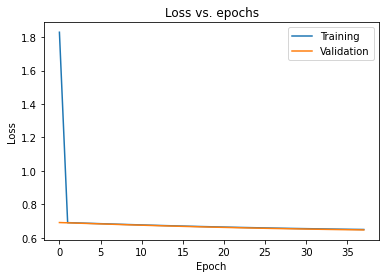

In [18]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [44]:
pd.DataFrame(history.history)

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,9.589412,0.448000,0.694810,0.359521
1,0.694009,0.350333,0.693001,0.640479
2,0.692245,0.670000,0.691656,0.640479
3,0.690536,0.670000,0.690227,0.640479
4,0.688802,0.670000,0.688774,0.640479
5,0.687049,0.670000,0.687345,0.640479
6,0.685282,0.670000,0.685971,0.640479
7,0.683642,0.670000,0.684576,0.640479
8,0.681939,0.670000,0.683263,0.640479
9,0.680333,0.670000,0.681970,0.640479


In [41]:
#b

In [45]:
#l2 regularizer

nn_model = Sequential([
                    Flatten(input_shape = (8, 15,3)),
                     Dense(2, activation = 'relu', input_shape = (360,),kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dense(4, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dense(1, activation = 'sigmoid',kernel_regularizer=tf.keras.regularizers.l2(0.001))
])

# the weight matrix is sometimes called the kernel.

In [46]:
# Start Training  - nothing changed here!

nn_model.compile(
    optimizer = 'adam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)
history = nn_model.fit(train_x, train_y, epochs = 38 , batch_size = 256, verbose = 0,validation_split=0.2)

In [47]:
pd.DataFrame(history.history)

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,8.288795,0.630333,7.846634,0.640479
1,5.939353,0.647667,4.816586,0.627164
2,4.091829,0.640667,3.345617,0.625832
3,2.924134,0.629333,2.643651,0.623169
4,2.244649,0.621000,2.101789,0.620506
5,1.800270,0.640000,1.618652,0.632490
6,1.451615,0.647333,1.318091,0.621838
7,1.132222,0.637333,1.004168,0.600533
8,0.828054,0.561667,0.836983,0.467377
9,0.750297,0.461000,0.761110,0.476698


In [ ]:
#c

In [48]:
nn_model = Sequential([
                    Flatten(input_shape = (8, 15,3)),
                    Dense(2, activation = 'relu', input_shape = (360,)),
                    Dropout(0.5),#dropout rate 
                    Dense(4, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])

In [49]:
# Start Training  - nothing changed here!

nn_model.compile(
    optimizer = 'adam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)
history = nn_model.fit(train_x, train_y, epochs = 38 , batch_size = 256, verbose = 0,validation_split=0.2)
pd.DataFrame(history.history)

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,1.384525,0.646000,0.691603,0.640479
1,0.697886,0.669667,0.690110,0.640479
2,0.688650,0.670000,0.688666,0.640479
3,0.686906,0.670000,0.687219,0.640479
4,0.685151,0.670000,0.685818,0.640479
5,0.686676,0.669667,0.684449,0.640479
6,0.681775,0.670000,0.683100,0.640479
7,0.680111,0.670000,0.681813,0.640479
8,0.681671,0.669667,0.680531,0.640479
9,0.679992,0.669667,0.679334,0.640479


In [ ]:
#d

In [50]:
nn_model = Sequential([
                    Flatten(input_shape = (8, 15,3)),
                    Dense(2, activation = 'relu', input_shape = (360,)),
                    Dense(4, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')
])

In [51]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=5) 


In [52]:
# Start Training - nothing changed here!

nn_model.compile(
    optimizer = 'adam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

# fit the model with validation set  

history = nn_model.fit(train_x, train_y, epochs = 38, batch_size = 256, verbose = 2, validation_split=0.2,
                    callbacks=[early_stopping]) 
# The 0.2 means that 20 percent of the training data will be held back for validation.

pd.DataFrame(history.history)

Epoch 1/38
12/12 - 0s - loss: 1.6630 - binary_accuracy: 0.6557 - val_loss: 0.6916 - val_binary_accuracy: 0.6405 - 303ms/epoch - 25ms/step
Epoch 2/38
12/12 - 0s - loss: 0.6904 - binary_accuracy: 0.6700 - val_loss: 0.6901 - val_binary_accuracy: 0.6405 - 25ms/epoch - 2ms/step
Epoch 3/38
12/12 - 0s - loss: 0.6886 - binary_accuracy: 0.6700 - val_loss: 0.6885 - val_binary_accuracy: 0.6405 - 26ms/epoch - 2ms/step
Epoch 4/38
12/12 - 0s - loss: 0.6867 - binary_accuracy: 0.6700 - val_loss: 0.6871 - val_binary_accuracy: 0.6405 - 26ms/epoch - 2ms/step
Epoch 5/38
12/12 - 0s - loss: 0.6849 - binary_accuracy: 0.6700 - val_loss: 0.6856 - val_binary_accuracy: 0.6405 - 27ms/epoch - 2ms/step
Epoch 6/38
12/12 - 0s - loss: 0.6832 - binary_accuracy: 0.6700 - val_loss: 0.6842 - val_binary_accuracy: 0.6405 - 30ms/epoch - 3ms/step


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,1.662959,0.655667,0.691581,0.640479
1,0.690414,0.670000,0.690065,0.640479
2,0.688584,0.670000,0.688548,0.640479
3,0.686747,0.670000,0.687075,0.640479
4,0.684930,0.670000,0.685649,0.640479
5,0.683207,0.670000,0.684233,0.640479


In [36]:
#2

In [21]:
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, load_dataset,predict, plot_decision_boundary, predict_dec


In [22]:
def model(X, Y, learning_rate = 0.01, num_iterations = 10000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 2, 4, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [23]:
def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
    
    return parameters

In [24]:
def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1)) 

    return parameters

In [25]:
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

        
    return parameters

In [26]:
train_X = train_x
train_Y = train_y

In [27]:
train_Y = train_Y.reshape((1,train_Y.shape[0]))

In [28]:
train_X = train_X.reshape(8*15*3,train_x.shape[0])
train_X = train_X/255.

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6435423404418876
Cost after iteration 2000: 0.6430955232438762
Cost after iteration 3000: 0.6430907369288391
Cost after iteration 4000: 0.6430906845707421
Cost after iteration 5000: 0.6430906839967188
Cost after iteration 6000: 0.6430906839904242
Cost after iteration 7000: 0.6430906839903553
Cost after iteration 8000: 0.6430906839903546
Cost after iteration 9000: 0.6430906839903543


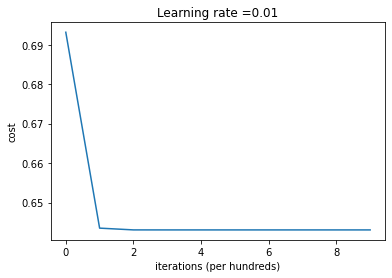

On the train set:
Accuracy: 0.6568686262747451


In [29]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)

/Users/harita_addanki/Desktop/Classes/DEEP LEARNING/HW2/SHIP-CLASSIFICATION/train/init_utils.py:17: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))
/Users/harita_addanki/Desktop/Classes/DEEP LEARNING/HW2/SHIP-CLASSIFICATION/train/init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/Users/harita_addanki/Desktop/Classes/DEEP LEARNING/HW2/SHIP-CLASSIFICATION/train/init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.8354639782019526
Cost after iteration 2000: 0.7449343492325382
Cost after iteration 3000: 0.6914857102334236
Cost after iteration 4000: 0.6655357408912072
Cost after iteration 5000: 0.6539054804775469
Cost after iteration 6000: 0.6482666015124573
Cost after iteration 7000: 0.6453456995151771
Cost after iteration 8000: 0.643993047942117
Cost after iteration 9000: 0.6433367557133564


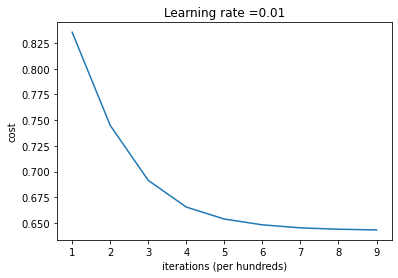

On the train set:
Accuracy: 0.6568686262747451


In [30]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)


Cost after iteration 0: 0.7260880114974172
Cost after iteration 1000: 0.6430002429178876
Cost after iteration 2000: 0.6417685822269072
Cost after iteration 3000: 0.6406959961933726
Cost after iteration 4000: 0.6394950845468004
Cost after iteration 5000: 0.6378712019132821
Cost after iteration 6000: 0.6360740258211117
Cost after iteration 7000: 0.6340842225206563
Cost after iteration 8000: 0.6317027192281357
Cost after iteration 9000: 0.628323112673181


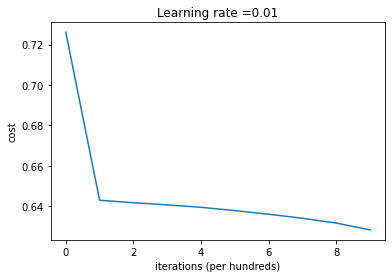

On the train set:
Accuracy: 0.6568686262747451


In [31]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)


In [50]:
pd.DataFrame(np.array([['66.40%', '66.46%', '66.40%']]),
                   columns=['zeroes', 'random', 'he'])

,zeroes,random,he
0,66.40%,66.46%,66.40%


In [81]:
#3

In [54]:
nn_model = Sequential([
                    Flatten(input_shape = (8, 15,3)),
                    BatchNormalization(),  # <- Batch normalization layer 1
                    Dense(2, activation = 'relu', input_shape = (360,)),
                    BatchNormalization(),  # <- Batch normalization layer 1
                    Dense(4, activation = 'relu'),
                    BatchNormalization(),  # <- Batch normalization layer 1
                    Dense(1, activation = 'sigmoid')
])

In [55]:
# Compile the model

nn_model.compile(optimizer = 'adam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] )
history = nn_model.fit(train_x,train_y , epochs=100, validation_split=0.15, batch_size=64,verbose=2)
d1 = pd.DataFrame(history.history)

Epoch 1/100
50/50 - 1s - loss: 0.7465 - binary_accuracy: 0.4558 - val_loss: 2.2821 - val_binary_accuracy: 0.6838 - 572ms/epoch - 11ms/step
Epoch 2/100
50/50 - 0s - loss: 0.6800 - binary_accuracy: 0.5561 - val_loss: 1.0805 - val_binary_accuracy: 0.6856 - 67ms/epoch - 1ms/step
Epoch 3/100
50/50 - 0s - loss: 0.6548 - binary_accuracy: 0.6164 - val_loss: 0.7599 - val_binary_accuracy: 0.6856 - 60ms/epoch - 1ms/step
Epoch 4/100
50/50 - 0s - loss: 0.6409 - binary_accuracy: 0.6408 - val_loss: 0.6719 - val_binary_accuracy: 0.6838 - 58ms/epoch - 1ms/step
Epoch 5/100
50/50 - 0s - loss: 0.6332 - binary_accuracy: 0.6509 - val_loss: 0.6478 - val_binary_accuracy: 0.6838 - 67ms/epoch - 1ms/step
Epoch 6/100
50/50 - 0s - loss: 0.6276 - binary_accuracy: 0.6637 - val_loss: 0.6407 - val_binary_accuracy: 0.6838 - 67ms/epoch - 1ms/step
Epoch 7/100
50/50 - 0s - loss: 0.6226 - binary_accuracy: 0.6641 - val_loss: 0.6304 - val_binary_accuracy: 0.6838 - 63ms/epoch - 1ms/step
Epoch 8/100
50/50 - 0s - loss: 0.6196 -

Epoch 61/100
50/50 - 0s - loss: 0.5574 - binary_accuracy: 0.7384 - val_loss: 0.6712 - val_binary_accuracy: 0.6377 - 65ms/epoch - 1ms/step
Epoch 62/100
50/50 - 0s - loss: 0.5536 - binary_accuracy: 0.7390 - val_loss: 0.6723 - val_binary_accuracy: 0.6323 - 61ms/epoch - 1ms/step
Epoch 63/100
50/50 - 0s - loss: 0.5509 - binary_accuracy: 0.7393 - val_loss: 0.6748 - val_binary_accuracy: 0.6448 - 60ms/epoch - 1ms/step
Epoch 64/100
50/50 - 0s - loss: 0.5539 - binary_accuracy: 0.7343 - val_loss: 0.6713 - val_binary_accuracy: 0.6448 - 60ms/epoch - 1ms/step
Epoch 65/100
50/50 - 0s - loss: 0.5481 - binary_accuracy: 0.7406 - val_loss: 0.6708 - val_binary_accuracy: 0.6483 - 61ms/epoch - 1ms/step
Epoch 66/100
50/50 - 0s - loss: 0.5504 - binary_accuracy: 0.7400 - val_loss: 0.6814 - val_binary_accuracy: 0.6519 - 62ms/epoch - 1ms/step
Epoch 67/100
50/50 - 0s - loss: 0.5445 - binary_accuracy: 0.7415 - val_loss: 0.6814 - val_binary_accuracy: 0.6465 - 60ms/epoch - 1ms/step
Epoch 68/100
50/50 - 0s - loss: 0.

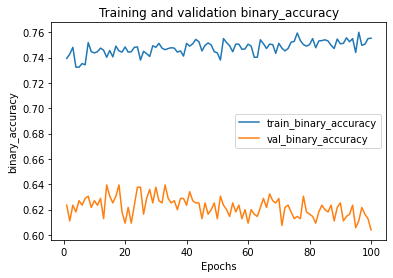

In [36]:
train_metrics = history.history['binary_accuracy']
val_metrics = history.history['val_binary_accuracy']
epochs = range(1, len(train_metrics) + 1)
plt.plot(epochs, train_metrics)
plt.plot(epochs, val_metrics)
plt.title('Training and validation '+ 'binary_accuracy')
plt.xlabel("Epochs")
plt.ylabel('binary_accuracy')
plt.legend(["train_"+'binary_accuracy', 'val_'+'binary_accuracy'])
plt.show()

In [56]:
nn_model = Sequential([
                    Flatten(input_shape = (8, 15,3)),
                    BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=tf.keras.initializers.Constant(value=0.9)
    ),
                    Dense(2, activation = 'relu', input_shape = (360,)),
BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=tf.keras.initializers.Constant(value=0.9)
    ),                    Dense(4, activation = 'relu'),
BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=tf.keras.initializers.Constant(value=0.9)
    ),                    Dense(1, activation = 'sigmoid')
])

In [57]:
# Compile the model

nn_model.compile(optimizer = 'adam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] )
history = nn_model.fit(train_x,train_y , epochs=100, validation_split=0.15, batch_size=64,verbose=2)
d2 = pd.DataFrame(history.history)

Epoch 1/100
50/50 - 1s - loss: 0.7215 - binary_accuracy: 0.5922 - val_loss: 0.6961 - val_binary_accuracy: 0.4263 - 617ms/epoch - 12ms/step
Epoch 2/100
50/50 - 0s - loss: 0.6791 - binary_accuracy: 0.6217 - val_loss: 0.6680 - val_binary_accuracy: 0.6483 - 74ms/epoch - 1ms/step
Epoch 3/100
50/50 - 0s - loss: 0.6604 - binary_accuracy: 0.6471 - val_loss: 0.6559 - val_binary_accuracy: 0.6519 - 63ms/epoch - 1ms/step
Epoch 4/100
50/50 - 0s - loss: 0.6512 - binary_accuracy: 0.6434 - val_loss: 0.6497 - val_binary_accuracy: 0.6661 - 68ms/epoch - 1ms/step
Epoch 5/100
50/50 - 0s - loss: 0.6470 - binary_accuracy: 0.6393 - val_loss: 0.6391 - val_binary_accuracy: 0.6696 - 70ms/epoch - 1ms/step
Epoch 6/100
50/50 - 0s - loss: 0.6389 - binary_accuracy: 0.6459 - val_loss: 0.6473 - val_binary_accuracy: 0.6696 - 68ms/epoch - 1ms/step
Epoch 7/100
50/50 - 0s - loss: 0.6371 - binary_accuracy: 0.6521 - val_loss: 0.6335 - val_binary_accuracy: 0.6750 - 69ms/epoch - 1ms/step
Epoch 8/100
50/50 - 0s - loss: 0.6310 -

Epoch 61/100
50/50 - 0s - loss: 0.5818 - binary_accuracy: 0.6967 - val_loss: 0.6542 - val_binary_accuracy: 0.6590 - 63ms/epoch - 1ms/step
Epoch 62/100
50/50 - 0s - loss: 0.5816 - binary_accuracy: 0.6982 - val_loss: 0.6465 - val_binary_accuracy: 0.6643 - 62ms/epoch - 1ms/step
Epoch 63/100
50/50 - 0s - loss: 0.5832 - binary_accuracy: 0.7004 - val_loss: 0.6487 - val_binary_accuracy: 0.6572 - 60ms/epoch - 1ms/step
Epoch 64/100
50/50 - 0s - loss: 0.5818 - binary_accuracy: 0.6976 - val_loss: 0.6583 - val_binary_accuracy: 0.6625 - 65ms/epoch - 1ms/step
Epoch 65/100
50/50 - 0s - loss: 0.5772 - binary_accuracy: 0.7051 - val_loss: 0.6532 - val_binary_accuracy: 0.6448 - 64ms/epoch - 1ms/step
Epoch 66/100
50/50 - 0s - loss: 0.5829 - binary_accuracy: 0.6986 - val_loss: 0.6557 - val_binary_accuracy: 0.6572 - 61ms/epoch - 1ms/step
Epoch 67/100
50/50 - 0s - loss: 0.5759 - binary_accuracy: 0.7077 - val_loss: 0.6536 - val_binary_accuracy: 0.6679 - 59ms/epoch - 1ms/step
Epoch 68/100
50/50 - 0s - loss: 0.

In [58]:
nn_model = Sequential([
                    Flatten(input_shape = (8, 15,3)),
                    BatchNormalization(),
                    Dense(2, activation = 'relu', input_shape = (360,)),
                    BatchNormalization(),                    
                Dense(4, activation = 'relu'),
BatchNormalization(
        momentum=0.55, 
        epsilon=0.005,
        beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=tf.keras.initializers.Constant(value=0.9)
    ),                    Dense(1, activation = 'sigmoid')
])

In [59]:
# Compile the model

nn_model.compile(optimizer = 'adam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] )
history = nn_model.fit(train_x,train_y , epochs=100, validation_split=0.15, batch_size=64,verbose=2)
d3 = pd.DataFrame(history.history)

Epoch 1/100
50/50 - 1s - loss: 0.7115 - binary_accuracy: 0.5602 - val_loss: 1.0219 - val_binary_accuracy: 0.6838 - 581ms/epoch - 12ms/step
Epoch 2/100
50/50 - 0s - loss: 0.6649 - binary_accuracy: 0.6101 - val_loss: 0.6814 - val_binary_accuracy: 0.6838 - 72ms/epoch - 1ms/step
Epoch 3/100
50/50 - 0s - loss: 0.6481 - binary_accuracy: 0.6311 - val_loss: 0.6528 - val_binary_accuracy: 0.6838 - 64ms/epoch - 1ms/step
Epoch 4/100
50/50 - 0s - loss: 0.6389 - binary_accuracy: 0.6584 - val_loss: 0.6282 - val_binary_accuracy: 0.6838 - 66ms/epoch - 1ms/step
Epoch 5/100
50/50 - 0s - loss: 0.6318 - binary_accuracy: 0.6650 - val_loss: 0.6317 - val_binary_accuracy: 0.6838 - 66ms/epoch - 1ms/step
Epoch 6/100
50/50 - 0s - loss: 0.6276 - binary_accuracy: 0.6659 - val_loss: 0.6279 - val_binary_accuracy: 0.6838 - 67ms/epoch - 1ms/step
Epoch 7/100
50/50 - 0s - loss: 0.6229 - binary_accuracy: 0.6659 - val_loss: 0.6345 - val_binary_accuracy: 0.6838 - 65ms/epoch - 1ms/step
Epoch 8/100
50/50 - 0s - loss: 0.6208 -

Epoch 61/100
50/50 - 0s - loss: 0.5678 - binary_accuracy: 0.7029 - val_loss: 0.6723 - val_binary_accuracy: 0.6341 - 59ms/epoch - 1ms/step
Epoch 62/100
50/50 - 0s - loss: 0.5640 - binary_accuracy: 0.7011 - val_loss: 0.6769 - val_binary_accuracy: 0.6430 - 58ms/epoch - 1ms/step
Epoch 63/100
50/50 - 0s - loss: 0.5703 - binary_accuracy: 0.7023 - val_loss: 0.6652 - val_binary_accuracy: 0.6536 - 60ms/epoch - 1ms/step
Epoch 64/100
50/50 - 0s - loss: 0.5609 - binary_accuracy: 0.7042 - val_loss: 0.6706 - val_binary_accuracy: 0.6501 - 58ms/epoch - 1ms/step
Epoch 65/100
50/50 - 0s - loss: 0.5645 - binary_accuracy: 0.6960 - val_loss: 0.6851 - val_binary_accuracy: 0.6394 - 59ms/epoch - 1ms/step
Epoch 66/100
50/50 - 0s - loss: 0.5615 - binary_accuracy: 0.7042 - val_loss: 0.6807 - val_binary_accuracy: 0.6430 - 59ms/epoch - 1ms/step
Epoch 67/100
50/50 - 0s - loss: 0.5623 - binary_accuracy: 0.7061 - val_loss: 0.6954 - val_binary_accuracy: 0.6270 - 60ms/epoch - 1ms/step
Epoch 68/100
50/50 - 0s - loss: 0.

In [60]:
nn_model = Sequential([
                    Flatten(input_shape = (8, 15,3)),
                    BatchNormalization(),
                    Dense(2, activation = 'relu', input_shape = (360,)),
                    BatchNormalization(),                    
                Dense(4, activation = 'relu'),
BatchNormalization(
        momentum=0.75, 
        epsilon=0.0008,
        beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=tf.keras.initializers.Constant(value=0.9)
    ),                    Dense(1, activation = 'sigmoid')
])

In [61]:
# Compile the model

nn_model.compile(optimizer = 'adam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] )
history = nn_model.fit(train_x,train_y , epochs=100, validation_split=0.15, batch_size=64,verbose=2)
d4 = pd.DataFrame(history.history)

Epoch 1/100
50/50 - 1s - loss: 0.7892 - binary_accuracy: 0.4853 - val_loss: 0.7999 - val_binary_accuracy: 0.4458 - 574ms/epoch - 11ms/step
Epoch 2/100
50/50 - 0s - loss: 0.6893 - binary_accuracy: 0.5518 - val_loss: 0.7076 - val_binary_accuracy: 0.3801 - 66ms/epoch - 1ms/step
Epoch 3/100
50/50 - 0s - loss: 0.6625 - binary_accuracy: 0.6286 - val_loss: 0.6594 - val_binary_accuracy: 0.6767 - 62ms/epoch - 1ms/step
Epoch 4/100
50/50 - 0s - loss: 0.6466 - binary_accuracy: 0.6468 - val_loss: 0.6469 - val_binary_accuracy: 0.6821 - 65ms/epoch - 1ms/step
Epoch 5/100
50/50 - 0s - loss: 0.6388 - binary_accuracy: 0.6584 - val_loss: 0.6441 - val_binary_accuracy: 0.6767 - 65ms/epoch - 1ms/step
Epoch 6/100
50/50 - 0s - loss: 0.6346 - binary_accuracy: 0.6644 - val_loss: 0.6400 - val_binary_accuracy: 0.6750 - 68ms/epoch - 1ms/step
Epoch 7/100
50/50 - 0s - loss: 0.6304 - binary_accuracy: 0.6653 - val_loss: 0.6376 - val_binary_accuracy: 0.6785 - 63ms/epoch - 1ms/step
Epoch 8/100
50/50 - 0s - loss: 0.6271 -

Epoch 61/100
50/50 - 0s - loss: 0.5743 - binary_accuracy: 0.7023 - val_loss: 0.7089 - val_binary_accuracy: 0.6306 - 60ms/epoch - 1ms/step
Epoch 62/100
50/50 - 0s - loss: 0.5736 - binary_accuracy: 0.6973 - val_loss: 0.6910 - val_binary_accuracy: 0.6306 - 58ms/epoch - 1ms/step
Epoch 63/100
50/50 - 0s - loss: 0.5723 - binary_accuracy: 0.7048 - val_loss: 0.6934 - val_binary_accuracy: 0.6412 - 57ms/epoch - 1ms/step
Epoch 64/100
50/50 - 0s - loss: 0.5777 - binary_accuracy: 0.6954 - val_loss: 0.7038 - val_binary_accuracy: 0.6323 - 59ms/epoch - 1ms/step
Epoch 65/100
50/50 - 0s - loss: 0.5676 - binary_accuracy: 0.7017 - val_loss: 0.6899 - val_binary_accuracy: 0.6430 - 59ms/epoch - 1ms/step
Epoch 66/100
50/50 - 0s - loss: 0.5694 - binary_accuracy: 0.7039 - val_loss: 0.6796 - val_binary_accuracy: 0.6341 - 59ms/epoch - 1ms/step
Epoch 67/100
50/50 - 0s - loss: 0.5667 - binary_accuracy: 0.7105 - val_loss: 0.6873 - val_binary_accuracy: 0.6412 - 59ms/epoch - 1ms/step
Epoch 68/100
50/50 - 0s - loss: 0.

In [62]:
nn_model = Sequential([
                    Flatten(input_shape = (8, 15,3)),
                    BatchNormalization(),
                    Dense(2, activation = 'relu', input_shape = (360,)),
BatchNormalization(
        momentum=0.75, 
        epsilon=0.0008,
        beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=tf.keras.initializers.Constant(value=0.9)
    ),                   Dense(4, activation = 'relu'),
BatchNormalization(
        momentum=0.75, 
        epsilon=0.0008,
        beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=tf.keras.initializers.Constant(value=0.9)
    ),                    Dense(1, activation = 'sigmoid')
])

In [63]:
# Compile the model

nn_model.compile(optimizer = 'adam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] )
history = nn_model.fit(train_x,train_y , epochs=100, validation_split=0.15, batch_size=64,verbose=2)
d5 = pd.DataFrame(history.history)

Epoch 1/100
50/50 - 1s - loss: 0.7431 - binary_accuracy: 0.5122 - val_loss: 0.7423 - val_binary_accuracy: 0.3694 - 578ms/epoch - 12ms/step
Epoch 2/100
50/50 - 0s - loss: 0.6715 - binary_accuracy: 0.5947 - val_loss: 0.6601 - val_binary_accuracy: 0.6785 - 65ms/epoch - 1ms/step
Epoch 3/100
50/50 - 0s - loss: 0.6512 - binary_accuracy: 0.6612 - val_loss: 0.6364 - val_binary_accuracy: 0.6838 - 64ms/epoch - 1ms/step
Epoch 4/100
50/50 - 0s - loss: 0.6403 - binary_accuracy: 0.6659 - val_loss: 0.6299 - val_binary_accuracy: 0.6838 - 66ms/epoch - 1ms/step
Epoch 5/100
50/50 - 0s - loss: 0.6332 - binary_accuracy: 0.6659 - val_loss: 0.6277 - val_binary_accuracy: 0.6838 - 63ms/epoch - 1ms/step
Epoch 6/100
50/50 - 0s - loss: 0.6291 - binary_accuracy: 0.6659 - val_loss: 0.6284 - val_binary_accuracy: 0.6838 - 62ms/epoch - 1ms/step
Epoch 7/100
50/50 - 0s - loss: 0.6256 - binary_accuracy: 0.6659 - val_loss: 0.6299 - val_binary_accuracy: 0.6838 - 66ms/epoch - 1ms/step
Epoch 8/100
50/50 - 0s - loss: 0.6212 -

Epoch 61/100
50/50 - 0s - loss: 0.5751 - binary_accuracy: 0.7102 - val_loss: 0.6646 - val_binary_accuracy: 0.6448 - 63ms/epoch - 1ms/step
Epoch 62/100
50/50 - 0s - loss: 0.5668 - binary_accuracy: 0.7142 - val_loss: 0.6660 - val_binary_accuracy: 0.6412 - 63ms/epoch - 1ms/step
Epoch 63/100
50/50 - 0s - loss: 0.5706 - binary_accuracy: 0.7080 - val_loss: 0.6617 - val_binary_accuracy: 0.6394 - 60ms/epoch - 1ms/step
Epoch 64/100
50/50 - 0s - loss: 0.5716 - binary_accuracy: 0.7127 - val_loss: 0.6571 - val_binary_accuracy: 0.6536 - 63ms/epoch - 1ms/step
Epoch 65/100
50/50 - 0s - loss: 0.5697 - binary_accuracy: 0.7158 - val_loss: 0.6683 - val_binary_accuracy: 0.6323 - 60ms/epoch - 1ms/step
Epoch 66/100
50/50 - 0s - loss: 0.5676 - binary_accuracy: 0.7086 - val_loss: 0.6621 - val_binary_accuracy: 0.6412 - 61ms/epoch - 1ms/step
Epoch 67/100
50/50 - 0s - loss: 0.5680 - binary_accuracy: 0.7139 - val_loss: 0.6657 - val_binary_accuracy: 0.6412 - 57ms/epoch - 1ms/step
Epoch 68/100
50/50 - 0s - loss: 0.

In [70]:
d5.sort_values(by=['binary_accuracy','val_binary_accuracy'],ascending=False)

,loss,binary_accuracy,val_loss,val_binary_accuracy
97,0.555067,0.728670,0.675248,0.639432
95,0.554863,0.728043,0.676504,0.626998
88,0.555327,0.726474,0.665092,0.632327
93,0.551363,0.726474,0.670838,0.630551
85,0.561571,0.726161,0.667391,0.628774
...,...,...,...,...
9,0.618378,0.665935,0.628947,0.683837
11,0.615378,0.663425,0.627443,0.683837
2,0.651184,0.661230,0.636418,0.683837
1,0.671508,0.594730,0.660143,0.678508


In [72]:
pd.DataFrame(np.array([['64.4%', '65.36%', '63.41%','63.76%','63.94%']]),
                   columns=['model1', 'model2','model3','model4','model5'],index=['validation accuracy'])

,model1,model2,model3,model4,model5
validation accuracy,64.4%,65.36%,63.41%,63.76%,63.94%
